# load data into Stata

In [12]:
use "/Users/ning/Downloads/Q2.dta", clear

# list all variable names in the dataset

In [13]:
ds

gpa  act


# list all the observations in your dataset

In [14]:
list


     +-----------+
     | gpa   act |
     |-----------|
  1. | 2.8    21 |
  2. | 3.4    24 |
  3. |   3    26 |
  4. | 3.5    27 |
  5. | 3.6    29 |
     |-----------|
  6. |   3    25 |
  7. | 2.7    25 |
  8. | 3.7    30 |
     +-----------+


# compute summary statistics

In [15]:
sum


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
         gpa |          8      3.2125    .3833592        2.7        3.7
         act |          8      25.875    2.850439         21         30


# regression

In [16]:
reg gpa act


      Source |       SS           df       MS      Number of obs   =         8
-------------+----------------------------------   F(1, 6)         =      8.20
       Model |  .594024707         1  .594024707   Prob > F        =    0.0287
    Residual |  .434725292         6  .072454215   R-squared       =    0.5774
-------------+----------------------------------   Adj R-squared   =    0.5070
       Total |     1.02875         7  .146964286   Root MSE        =    .26917

------------------------------------------------------------------------------
         gpa |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         act |   .1021978    .035692     2.86   0.029     .0148626     .189533
       _cons |   .5681319   .9284214     0.61   0.563    -1.703633    2.839897
------------------------------------------------------------------------------


# plot data points and regression line

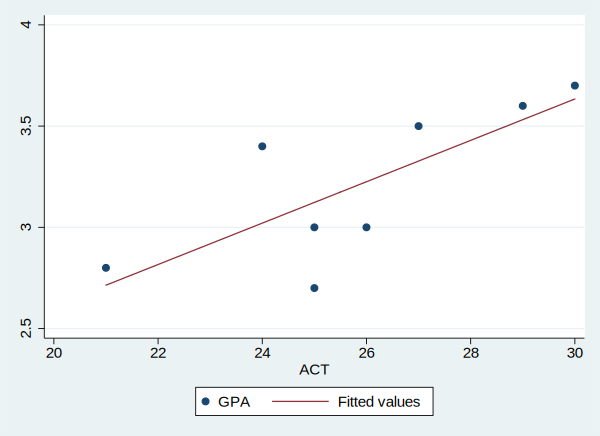

In [17]:
twoway scatter gpa act || lfit gpa act